In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [41]:
df = pd.read_csv(r"C:\Users\gabri\Downloads\experiment_dataset.csv")

In [42]:
df

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579
...,...,...,...,...,...,...,...
995,995,39,Location2,Device2,Variant B,17.252030,0.092211
996,996,38,Location3,Device2,Control,30.075898,0.078151
997,997,60,Location2,Device3,Control,31.929223,0.125213
998,998,35,Location2,Device2,Variant B,14.680299,0.095423


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Age         1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Device      1000 non-null   object 
 4   Variant     1000 non-null   object 
 5   Time Spent  1000 non-null   float64
 6   CTR         1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [44]:
df.describe(include='all')

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
count,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000
unique,NaN,NaN,3,3,3,NaN,NaN
top,NaN,NaN,Location2,Device3,Control,NaN,NaN
freq,NaN,NaN,343,346,340,NaN,NaN
mean,499.500000,40.715000,NaN,NaN,NaN,22.713345,0.109145
std,288.819436,13.655557,NaN,NaN,NaN,5.479292,0.022366
min,0.000000,18.000000,NaN,NaN,NaN,7.114806,0.012975
25%,249.750000,28.000000,NaN,NaN,NaN,19.216608,0.094286
50%,499.500000,41.000000,NaN,NaN,NaN,22.506707,0.108944
75%,749.250000,53.000000,NaN,NaN,NaN,26.255950,0.124238


In [45]:
df.head()

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579


Text(0.5, 1.0, 'Age Histogram')

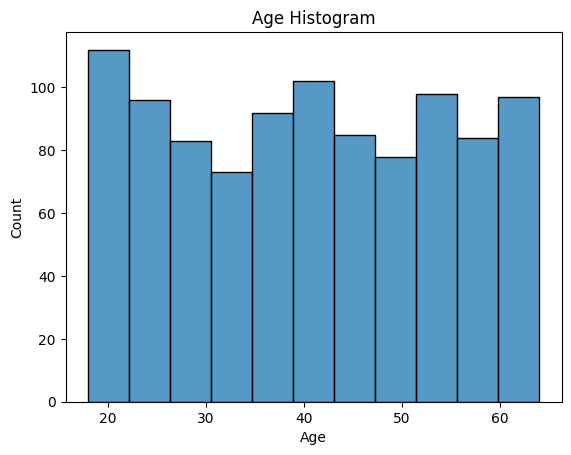

In [46]:
# Based on description of the data, there does not appear to be outliers, but lets confirm with graphs
# Since Unnamed appears to act as the index, while it is unnesessary it does not need to be removed
sns.histplot(df['Age'])
plt.title("Age Histogram")

Text(0.5, 1.0, 'Location Histogram')

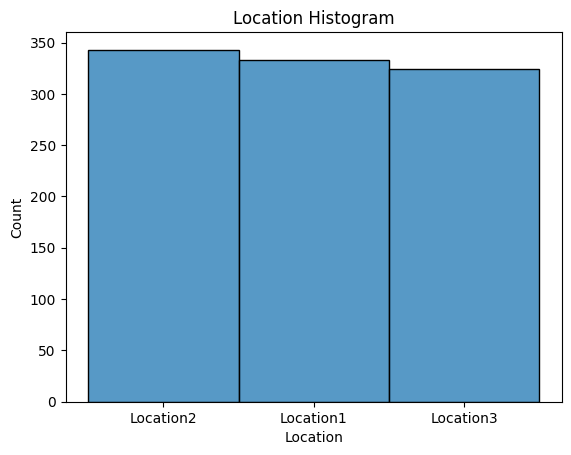

In [47]:
sns.histplot(df['Location'])
plt.title("Location Histogram")

Text(0.5, 1.0, 'Device Histogram')

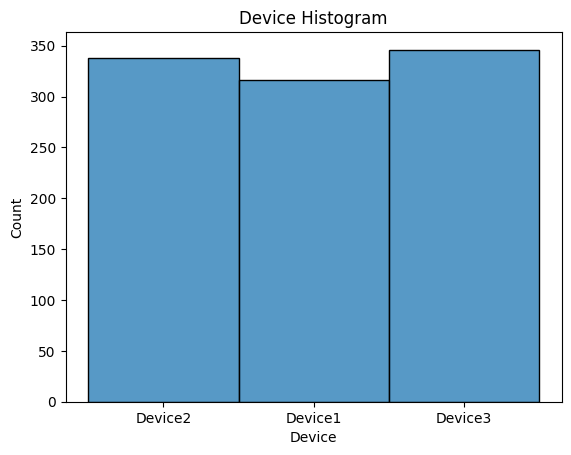

In [48]:
sns.histplot(df['Device'])
plt.title("Device Histogram")

Text(0.5, 1.0, 'Variant Histogram')

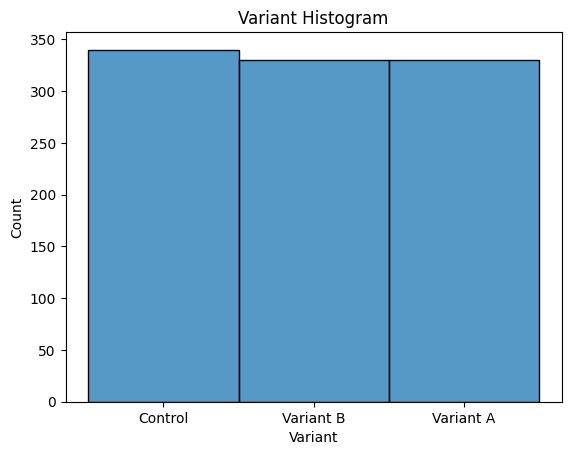

In [49]:
sns.histplot(df['Variant'])
plt.title("Variant Histogram")

Text(0.5, 1.0, 'Time Spent Histogram')

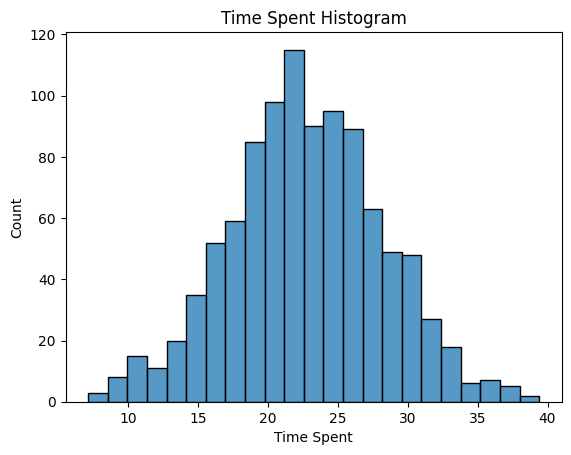

In [50]:
sns.histplot(df['Time Spent'])
plt.title("Time Spent Histogram")

Text(0.5, 1.0, 'CTR Histogram')

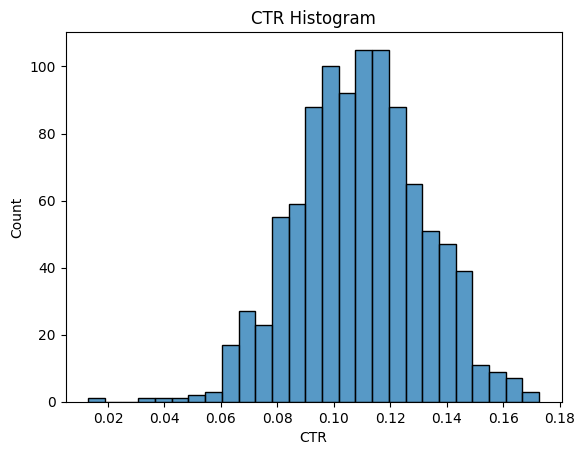

In [51]:
sns.histplot(df['CTR'])
plt.title("CTR Histogram")

In [52]:
# When keeping in mind the actual values in the x-axis, there does not appear to be any outliers in the columns.
# Now it is time to answer question 1
variant_time_spent = df.groupby('Variant')['Time Spent'].mean()
print(variant_time_spent)


Variant
Control      20.070781
Variant A    24.805547
Variant B    23.343783
Name: Time Spent, dtype: float64


In [53]:
variant_CTR = df.groupby('Variant')['CTR'].mean()
print(variant_CTR)

Variant
Control      0.098554
Variant A    0.120269
Variant B    0.108933
Name: CTR, dtype: float64


For question 1, when all three variants were compared to "Time Spent" and "CTR", the mean values had a lift. The lift exists from Control (Time Spent = 20.070781, CTR = 0.098554), to Variant B (Time Spent = 23.343783, CTR = 0.108933), to Variant A (Time Spent = 24.805547, CTR = 0.120269).

In [54]:
# For question 2, since we are comparing the variants to the control group, the t-test would be best
variant1 = df[df['Variant'] == 'Variant A']['Time Spent']
control_group = df[df['Variant'] == 'Control']['Time Spent']

t_stat, p_val = stats.ttest_ind(variant1, control_group)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 12.142363487472364
P-value: 8.488565644996449e-31


In [55]:
variant2 = df[df['Variant'] == 'Variant B']['Time Spent']
control_group = df[df['Variant'] == 'Control']['Time Spent']

t_stat, p_val = stats.ttest_ind(variant2, control_group)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 8.174237395991806
P-value: 1.496358076285182e-15


In [56]:
variant1 = df[df['Variant'] == 'Variant A']['CTR']
control_group = df[df['Variant'] == 'Control']['CTR']

t_stat, p_val = stats.ttest_ind(variant1, control_group)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 13.829424737499187
P-value: 1.9602781373243157e-38


In [57]:
variant2 = df[df['Variant'] == 'Variant B']['CTR']
control_group = df[df['Variant'] == 'Control']['CTR']

t_stat, p_val = stats.ttest_ind(variant2, control_group)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 6.4718143491783255
P-value: 1.8743198199982106e-10


In Question 2, when comparing values of each individual variant to the control group, it can be seen that the P-values are all under 0.05, which is significant. That means that if the test were to be conducted again with new samples, it would likely yield similar results. Each variant when compared to the control group for both "Time Spent" and "CTR" had a positive and fairly large T-statistic. The comparision showed a positive magnitude and value of the T-statistic, indicating that the respective variant means for "Time Spent" and "CTR" are larger than the control group. For example, when comparing the "CTR" values of "Variant B" to "Control", it can be seen that the T-statistic is 6.4718143491783255 and the P-value is 1.8743198199982106e-10. This means that the "Variant B" mean is larger than the "Control" mean. It also means the P-value being lower than 0.05 indicates that this level of difference is significant and repeatable if additional samples are taken. 

In [58]:
# Before answering question 3, lets compare "Variant A" and "Variant B" to see which is the better feature
variant1 = df[df['Variant'] == 'Variant A']['Time Spent']
variant2 = df[df['Variant'] == 'Variant B']['Time Spent']

t_stat, p_val = stats.ttest_ind(variant1, variant2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 3.6788175394209075
P-value: 0.0002534771014765265


In [59]:
variant1 = df[df['Variant'] == 'Variant A']['CTR']
variant2 = df[df['Variant'] == 'Variant B']['CTR']

t_stat, p_val = stats.ttest_ind(variant1, variant2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 7.08499696316128
P-value: 3.587180487986577e-12


Question 3

When answering question 1 and 2, it could clearly be seen that "Variant A" would be the better feature the "Variant B". In question 1, when comparing the Variant mean values relative to "Time Spent", "Variant A" (24.805547 minutes) was larger than "Variant B" (23.343783 minutes). This result indicates that "Variant A" has a mean value 1.461764 minutes greater than "Variant B", which shows that people spend more time on the "Variant A" feature. The mean values relative to CTR (Click Through Rate, how far someone goes through the feature with 0 meaning not going through it and 1 being going through the entire feature) indicate the same type of answer. The "Variant A" mean was 0.120269 and "Variant B" was 0.108933 showing that people go through more of the "Variant A" feature. For question 2, when comparing each Variant to the Control group for both Time Spent and CTR, "Variant A" had a higher positive T-statistic and a lower p-value. This means the difference between means for "Variant A" is larger and is most likely to repeat itself with additional variables. I also added a t-test comparing "Variant A" to "Variant B" for average Time Spent and CTR, and it showed that "Variant A" has a larger mean for both, and this result was significant given the p-values were less than 0.05. 

Based on everything said above, I would recommend to the engineering team deploy "Variant A" and discard "Variant B"

Question 4

As mentioned above, the first action I would take is to drop "Variant B". It has been proven that "Variant A" is the better feature amd it is not worth it to waste resources improving "Variant B". Establishing that, I would keep the control group to have them solely focused on "Variant A".

Now onto the plan, I would roll-out the feature slowly, using experimentation. Using experimentation is important because it will provide feedback on the unique aspects of the feature in relatively short order. Since at this point the control group is focused on "Variant A", for a couple of weeks I would monitor which aspects of the Variant the group focuses on to see what they like and dislike. From there, I would adjust the Variant by removing the unused aspects, implementing the adjustments, and roll-out a more complete version of the Variant. Finally, I would montior the Variant for another couple of weeks, and repeat the process until the Variant was at a point that I felt comfortable rolling out 100% of it.